In [1]:
import tensorflow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense

from tensorflow.keras.layers.experimental.preprocessing import Rescaling

import PIL
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

import matplotlib.pyplot as plt

import sklearn
import pandas
import numpy
import json
import os
from datetime import datetime
from sklearn.model_selection import train_test_split

In [2]:
image_width = 128
image_height = 128
image_channels = 3
batch_size = 32
epochs = 10

In [3]:
model = tensorflow.keras.Sequential()

In [4]:
model.add(Rescaling(1./255, input_shape=(image_height, image_width, 3)))

In [5]:
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (image_width, image_height, image_channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

In [6]:
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

In [7]:
model.add(Conv2D(150, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

In [8]:
model.add(Flatten())

In [9]:
#model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [10]:
model.add(Dense(2, activation = 'softmax'))

In [11]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [12]:
class CustomCallback(tensorflow.keras.callbacks.Callback):
    
    def on_train_begin(self, logs = None):
        print("Starting training on this.date")
        
    def on_train_end(self, logs = None):
        print("Stopped training")
        
    def on_epoch_begin(self, epoch, logs = None):
        print("Epoch begin")
        
    def on_epoch_end(self, epoch, logs = None):
        print("Epoch end")
    
    def on_test_begin(self, logs = None):
        pass
        #print("Test start")
        
    def on_test_end(self, logs = None):
        pass
        #print("Test end")
        
    def on_predict_begin(self, logs = None):
        print("Predicting")
        
    def on_predict_end(self, logs = None):
        print("End predicting")
    
    def on_train_batch_begin(self, batch, logs=None):
        #print("Train batch begin")
        pass

    def on_train_batch_end(self, batch, logs=None):
        #print("Train batch end")
        pass

    def on_test_batch_begin(self, batch, logs=None):
        pass
        #print("Test batch begin")

    def on_test_batch_end(self, batch, logs=None):
        pass
        #keys = list(logs.keys())
        #print("Test batch end")

    def on_predict_batch_begin(self, batch, logs=None):
        pass
        #keys = list(logs.keys())
        #print("Predict batch begin")

    def on_predict_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("Predict batch end")

In [13]:


train_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
  "./humans/train/",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

val_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
  "./humans/validation/",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)


Found 6022 files belonging to 2 classes.
Using 4818 files for training.
Found 6022 files belonging to 2 classes.
Using 1204 files for validation.


In [14]:
AUTOTUNE = tensorflow.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[CustomCallback()],
)
model.save("testen")

Starting training on this.date
Epoch 1/10
Epoch begin
151/151 [==============================] - 354s 2s/step - loss: 0.3230 - accuracy: 0.9281 - val_loss: 3.0110 - val_accuracy: 0.6586
Epoch end
Epoch 2/10
Epoch begin
 32/151 [=====>........................] - ETA: 6:08 - loss: 0.0583 - accuracy: 0.9870

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [29]:
epochs_range = range(epochs)

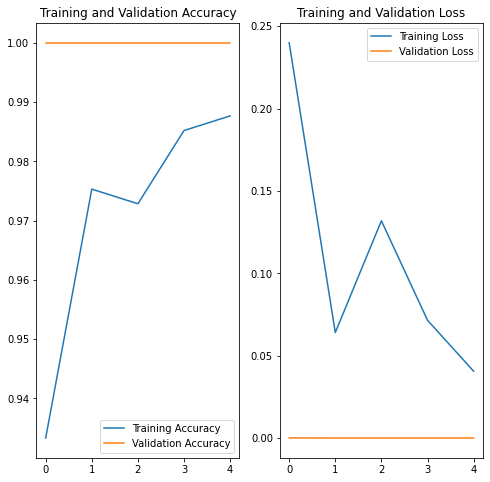

In [30]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()